### Basic cleaning of the data was done in Power BI, where some visualizations were also drawn. The data was rearranged to fit the age and gender columns correctly, while ad_id, reporting_end and fb_campaign_id were removed. Reporting_start column was formatted to have only the day of the month, since the month and year were all the same. The reporting_start was further changed to the particular day of the week name (Monday, Tuesday and so on) for better analysis purposes. So from that we saw that the marketing campaign lasted for two weeks. Lastly, we extracted the start of each age row in order to get a singular age to represent the whole age group; this was done for easier computing while creating the model.

## Imports

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing the original dataset
original_dataset = pd.read_csv('data.csv')
original_dataset.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [3]:
# importing the cleaned dataset
df = pd.read_csv('cleaned_data1.csv')

# Splittin the dataset to x (independent variables) and y (dependent variable)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
x.head()

,reporting_start,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion
0,Saturday,936,30,M,25,30,27,605,0,0.0,1
1,Saturday,936,30,M,26,32,29,1030,0,0.0,1
2,Sunday,936,30,M,36,38,38,962,0,0.0,1
3,Monday,936,35,M,23,24,27,239,0,0.0,1
4,Tuesday,936,35,M,26,27,28,591,0,0.0,1


In [5]:
x.describe()

,campaign_id,age,interest1,interest2,interest3,impressions,clicks,spent,total_conversion
count,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000
mean,979.819773,36.321085,33.884514,1.180606e+05,42.474191,6.872501e+04,11.629921,17.597760,17.245844
std,103.403952,5.903868,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,30.412919
min,916.000000,30.000000,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,916.000000,30.000000,16.000000,2.200000e+01,19.000000,1.445000e+02,1.000000,0.000000,1.000000
50%,936.000000,35.000000,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,2.000000
75%,936.000000,40.000000,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,21.000000
max,1178.000000,45.000000,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,114.000000


### Visualization and Data Analysis

In [6]:
df.gender.value_counts()

M    592
F    551
Name: gender, dtype: int64

In [7]:
df.age.value_counts()

30    426
45    259
35    248
40    210
Name: age, dtype: int64

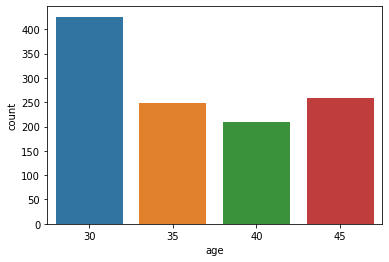

In [8]:
sns.countplot(df.age);

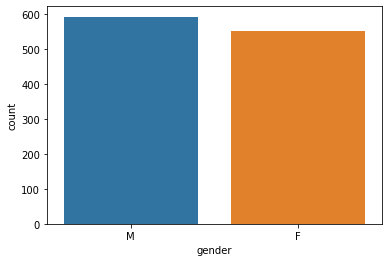

In [9]:
sns.countplot(df.gender);

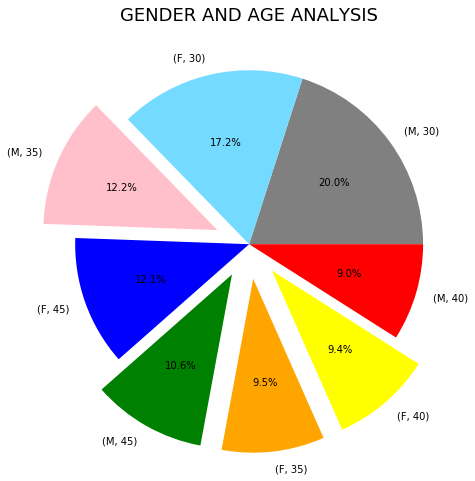

In [10]:
colors = ['grey','#75daff','pink','blue','green','orange','yellow','red']
df[['gender','age']].value_counts().plot.pie(explode=[0,0,0.2,0,0.2,0.2,0.2,0],autopct='%1.1f%%',colors=colors, figsize = (8,8))
plt.ylabel('')
plt.title('GENDER AND AGE ANALYSIS',fontstyle='normal', fontsize=18);

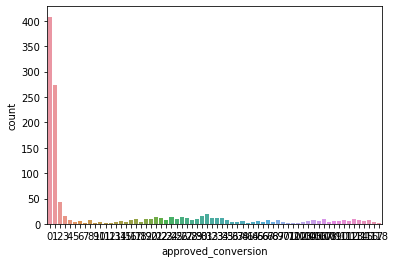

In [11]:
sns.countplot(df.approved_conversion);

In [12]:
# checking to determine the correlation
corrmat = df.corr()
corrmat

,campaign_id,age,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
campaign_id,1.000000,-0.193393,-0.158668,-0.273023,-0.152725,0.551593,0.526561,0.545225,-0.270697,-0.311204
age,-0.193393,1.000000,0.059787,0.193400,0.181220,-0.096652,-0.036452,-0.054164,0.141398,0.158750
interest1,-0.158668,0.059787,1.000000,0.246366,0.211240,-0.134762,-0.104568,-0.134160,0.845414,0.838393
interest2,-0.273023,0.193400,0.246366,1.000000,0.905184,-0.146632,-0.060082,-0.138460,0.416684,0.441372
interest3,-0.152725,0.181220,0.211240,0.905184,1.000000,-0.109010,-0.031484,-0.099641,0.201631,0.220789
impressions,0.551593,-0.096652,-0.134762,-0.146632,-0.109010,1.000000,0.965629,0.980918,-0.071015,-0.142692
clicks,0.526561,-0.036452,-0.104568,-0.060082,-0.031484,0.965629,1.000000,0.992596,-0.038972,-0.105217
spent,0.545225,-0.054164,-0.134160,-0.138460,-0.099641,0.980918,0.992596,1.000000,-0.079021,-0.147496
total_conversion,-0.270697,0.141398,0.845414,0.416684,0.201631,-0.071015,-0.038972,-0.079021,1.000000,0.995392
approved_conversion,-0.311204,0.158750,0.838393,0.441372,0.220789,-0.142692,-0.105217,-0.147496,0.995392,1.000000


In [13]:
corrmat.shape

(10, 10)

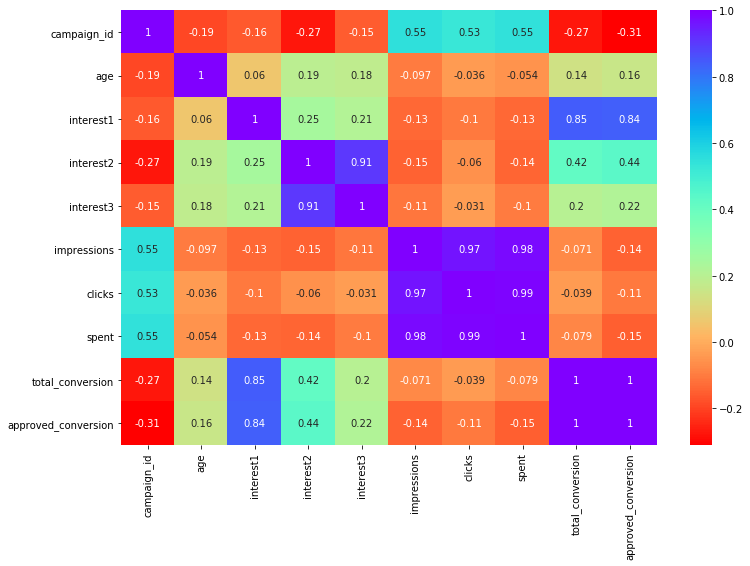

In [14]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(corrmat, annot=True, cmap='rainbow_r');

In [15]:
corrmat.index

Index(['campaign_id', 'age', 'interest1', 'interest2', 'interest3',
       'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

In [16]:
# creating a function to get the correlated features

def get_correlated_feature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    
    dh = pd.DataFrame(data=value, index=feature, columns=['corr_value'])
    return dh

In [17]:
threshold = 0.2
corr_df = get_correlated_feature(corrmat['approved_conversion'],threshold)

In [18]:
corr_df

,corr_value
campaign_id,-0.311204
interest1,0.838393
interest2,0.441372
interest3,0.220789
total_conversion,0.995392
approved_conversion,1.000000


In [19]:
correlated_data = df[corr_df.index]
correlated_data.head()

,campaign_id,interest1,interest2,interest3,total_conversion,approved_conversion
0,936,25,30,27,1,0
1,936,26,32,29,1,0
2,936,36,38,38,1,0
3,936,23,24,27,1,0
4,936,26,27,28,1,0


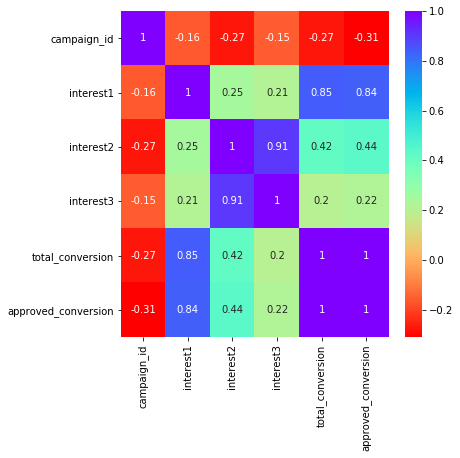

In [20]:
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(correlated_data.corr(), annot=True, cmap='rainbow_r');

## Encoding the categorical data

In [21]:
# get dummies for age
x = pd.concat([x, pd.get_dummies(x['reporting_start'], drop_first=True, prefix='rs')],axis=1)
x.drop('reporting_start',inplace=True,axis=1)

In [22]:
# Encoding the gender column
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
x['gender'] = lb.fit_transform(x['gender'])

x.head()

,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,rs_Monday,rs_Saturday,rs_Sunday,rs_Thursday,rs_Tuesday,rs_Wednesday
0,936,30,1,25,30,27,605,0,0.0,1,0,1,0,0,0,0
1,936,30,1,26,32,29,1030,0,0.0,1,0,1,0,0,0,0
2,936,30,1,36,38,38,962,0,0.0,1,0,0,1,0,0,0
3,936,35,1,23,24,27,239,0,0.0,1,1,0,0,0,0,0
4,936,35,1,26,27,28,591,0,0.0,1,0,0,0,0,1,0


In [23]:
x.clicks=x.clicks.astype(int)
x.age=x.age.astype(int)
x.impressions=x.impressions.astype(int)
x.spent=x.spent.astype(int)
x.interest1=x.interest1.astype(int)
x.interest2=x.interest2.astype(int)
x.interest3=x.interest3.astype(int)
x.campaign_id=x.campaign_id.astype('category')
x.total_conversion=x.total_conversion.astype(int)

x.dtypes

campaign_id         category
age                    int32
gender                 int32
interest1              int32
interest2              int32
interest3              int32
impressions            int32
clicks                 int32
spent                  int32
total_conversion       int32
rs_Monday              uint8
rs_Saturday            uint8
rs_Sunday              uint8
rs_Thursday            uint8
rs_Tuesday             uint8
rs_Wednesday           uint8
dtype: object

In [24]:
# Encoding the approved_conversion column to have class balance. 
y = y.replace([range(2,22000)], 1)

y = y.astype('category')
y.value_counts()

1    735
0    408
Name: approved_conversion, dtype: int64

## Splitting the dataset to Trainning and Test set

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train.head()

,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,rs_Monday,rs_Saturday,rs_Sunday,rs_Thursday,rs_Tuesday,rs_Wednesday
12,936,35,0,64,65,68,1393,0,0,1,0,0,0,0,0,0
758,916,35,0,110,502710,72,105,8,2,108,0,0,0,0,0,0
636,1178,35,1,25,30,29,368986,59,100,0,0,0,0,0,1,0
1109,916,40,0,29,195220,51,78,1,0,23,0,0,0,1,0,0
743,916,30,1,103,72228,5,8,4,4,101,0,0,0,0,0,0


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[-0.43847354, -0.24253441, -1.065605  , ..., -0.34655164,
        -0.39803064, -0.44838739],
       [-0.62883349, -0.24253441, -1.065605  , ..., -0.34655164,
        -0.39803064, -0.44838739],
       [ 1.86488192, -0.24253441,  0.93843403, ..., -0.34655164,
         2.5123694 , -0.44838739],
       ...,
       [-0.62883349, -0.24253441,  0.93843403, ..., -0.34655164,
        -0.39803064, -0.44838739],
       [-0.62883349,  1.43049538,  0.93843403, ..., -0.34655164,
         2.5123694 , -0.44838739],
       [-0.62883349,  1.43049538, -1.065605  , ..., -0.34655164,
        -0.39803064, -0.44838739]])

## Trainning the Model on the Trainning Sets and Predicting the Test Set results

### Using logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [28]:
# Predicting the y_test result with the classsifier model
y_pred = classifier.predict(x_test)

# Using confusion matrix and accuracy score to analyse the model's accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[77 13]
 [51 88]]


0.7205240174672489

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71        90
           1       0.87      0.63      0.73       139

    accuracy                           0.72       229
   macro avg       0.74      0.74      0.72       229
weighted avg       0.77      0.72      0.72       229



In [30]:
# Tuning the hyperparameters using Randomized Search Cv to try to improve the Model

# Setting up the grid parameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [32]:
# checking the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [33]:
rs_log_reg.score(x_test, y_test)

0.74235807860262

#### The model improved after Tuning the hyperparameters 

### Using Naive Bayes

In [34]:
# Using Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [35]:
# Predicting the y_test result with the classsifier model
y_pred = model.predict(x_test)

# Using confusion matrix and accuracy score to analyse the model's accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88  2]
 [57 82]]


0.74235807860262